In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme()
plt.style.use("seaborn-v0_8")

In [5]:
df = pd.read_csv("../data/netflix_titles.csv")

df.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
df.info()
df.describe(include="all").T
df.isna().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.columns = df.columns.str.lower().str.replace(" ", "_")

df["date_added"] = pd.to_datetime(df["date_added"])


ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
df = df.drop_duplicates()
df.columns = df.columns.str.lower().str.replace(" ", "_")

df["date_added"] = pd.to_datetime(df["date_added"])

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
df = df.drop_duplicates()
df.columns = df.columns.str.lower().str.replace(" ", "_")

df["date_added"] = pd.to_datetime(
    df["date_added"].str.strip(),
    format="%B %d, %Y",
    errors="coerce"
)


In [10]:
df["date_added"].head()
df["date_added"].isna().sum()


np.int64(10)

Text(0.5, 1.0, 'Répartition Films vs Séries')

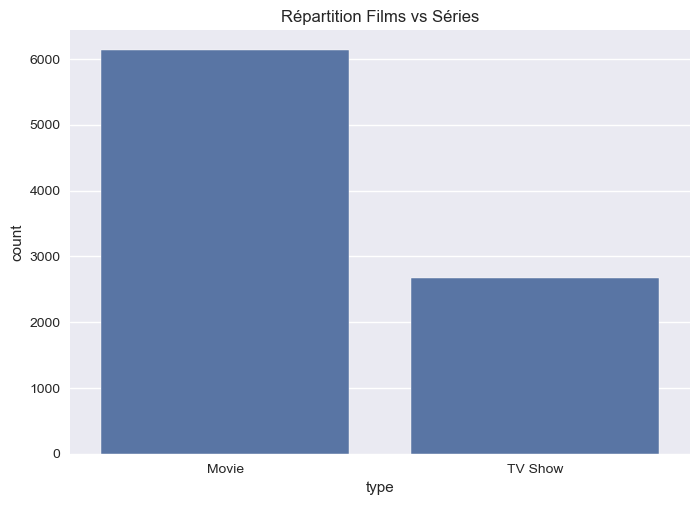

In [11]:
sns.countplot(data=df, x="type")
plt.title("Répartition Films vs Séries")


In [12]:
df["main_genre"].value_counts().head(10)


KeyError: 'main_genre'

In [13]:
def first_value(x):
    if pd.isna(x):
        return np.nan
    return str(x).split(",")[0].strip()

df["main_genre"] = df["listed_in"].apply(first_value)


In [14]:
df["main_genre"].value_counts().head(10)


main_genre
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     388
Stand-Up Comedy              334
Horror Movies                275
Name: count, dtype: int64

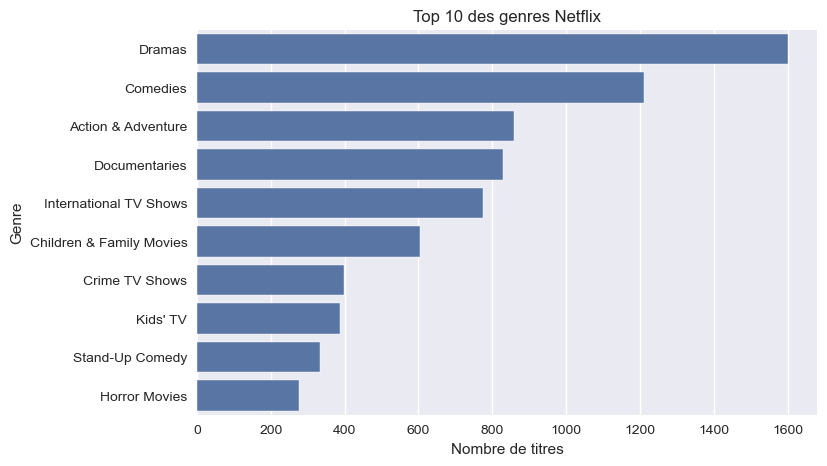

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=df["main_genre"].value_counts().head(10).values,
    y=df["main_genre"].value_counts().head(10).index
)
plt.title("Top 10 des genres Netflix")
plt.xlabel("Nombre de titres")
plt.ylabel("Genre")
plt.show()


In [16]:
df["main_country"].value_counts().head(10)


KeyError: 'main_country'

In [17]:
def first_value(x):
    if pd.isna(x):
        return np.nan
    return str(x).split(",")[0].strip()

df["main_country"] = df["country"].apply(first_value)


In [18]:
df["main_country"].value_counts().head(10)


main_country
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: count, dtype: int64

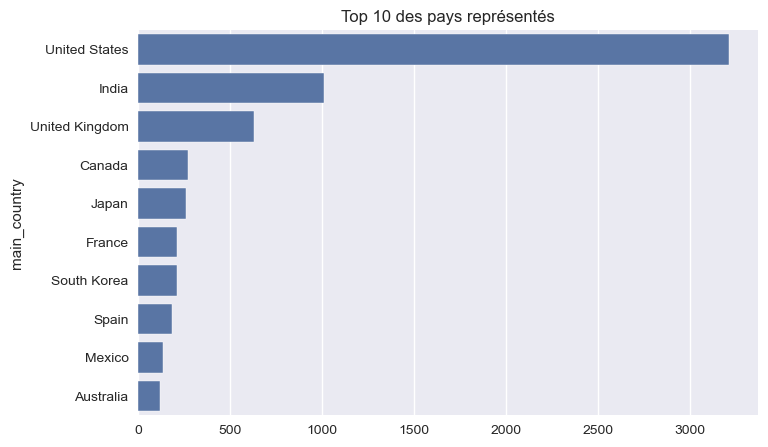

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=df["main_country"].value_counts().head(10).values,
    y=df["main_country"].value_counts().head(10).index
)
plt.title("Top 10 des pays représentés")
plt.show()


In [20]:
df["main_country"].value_counts().head(10)


main_country
United States     3211
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: count, dtype: int64

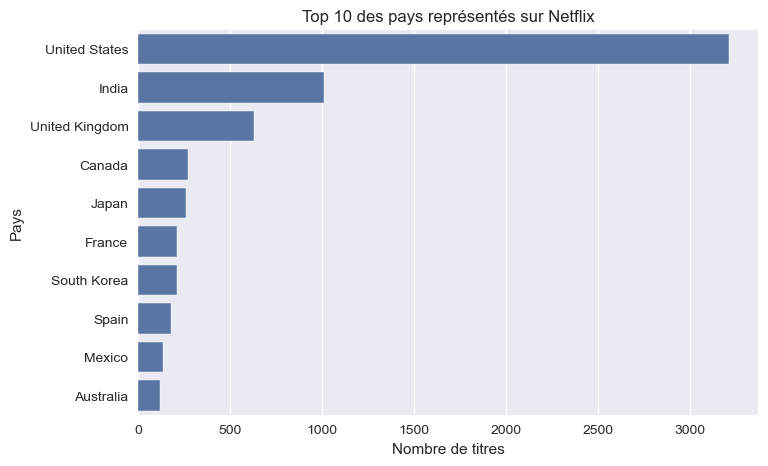

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=df["main_country"].value_counts().head(10).values,
    y=df["main_country"].value_counts().head(10).index
)
plt.title("Top 10 des pays représentés sur Netflix")
plt.xlabel("Nombre de titres")
plt.ylabel("Pays")
plt.show()


In [22]:
df["year_added"] = df["date_added"].dt.year


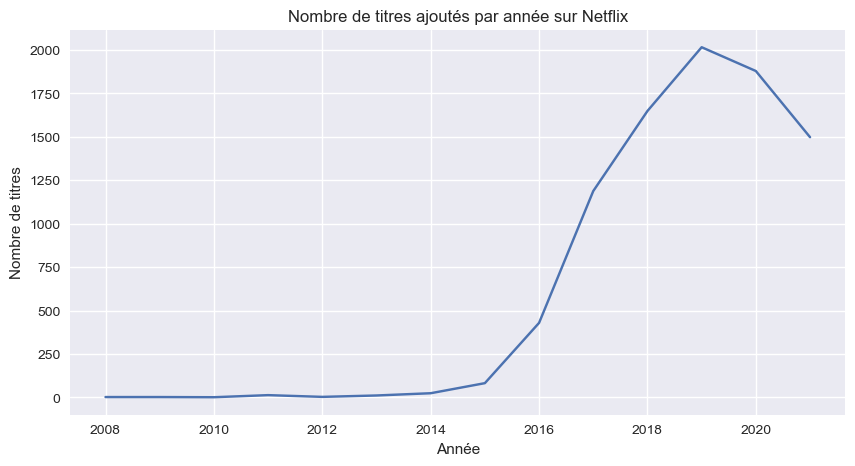

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df.groupby("year_added").size().reset_index(name="count"),
    x="year_added",
    y="count"
)
plt.title("Nombre de titres ajoutés par année sur Netflix")
plt.xlabel("Année")
plt.ylabel("Nombre de titres")
plt.show()


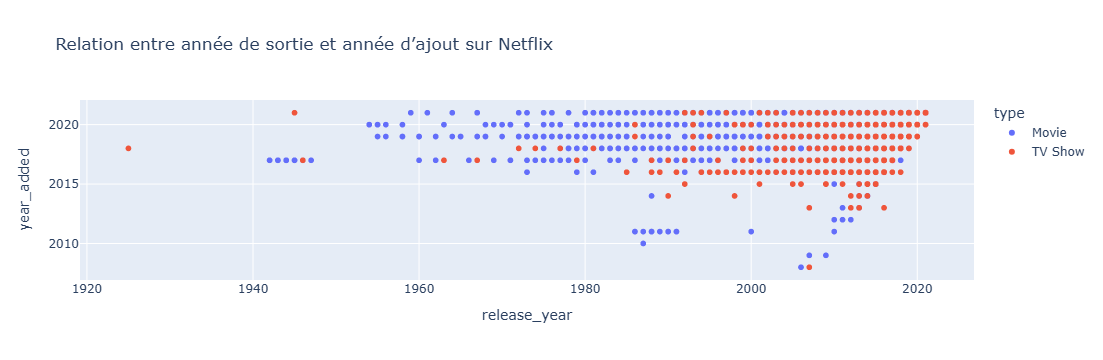

In [24]:
fig = px.scatter(
    df,
    x="release_year",
    y="year_added",
    color="type",
    hover_data=["title", "main_genre", "main_country"],
    title="Relation entre année de sortie et année d’ajout sur Netflix"
)
fig.show()


## Conclusion

Notre analyse exploratoire du catalogue Netflix met en évidence plusieurs tendances importantes.  
Tout d’abord, les **films sont légèrement plus nombreux que les séries**, ce qui confirme que Netflix reste historiquement orienté vers le contenu cinématographique, même si les séries ont fortement augmenté ces dernières années.  
Les genres dominants sont principalement **Drama**, **Comedy**, **Documentary**, et **International Movies**, reflétant la diversité croissante du catalogue.  
Au niveau géographique, les pays les plus représentés sont les **États-Unis**, **l’Inde**, et le **Royaume-Uni**.  
Nous observons également que le catalogue Netflix a **fortement augmenté après 2015**, période correspondant à l’expansion internationale de la plateforme.  
Enfin, le dataset contient de nombreuses valeurs manquantes, notamment dans `director`, `cast` et `country`.

## Limites

- Le dataset ne contient pas d'information sur la popularité réelle des titres.  
- Les dates ajoutées au catalogue ne sont pas toujours précises.  
- Le dataset représente un instant figé du catalogue.  
- Certaines colonnes textuelles nécessitent un nettoyage plus avancé.

